# Introduction.

This project consists of finding the two best markets to advertise courses in programming. This project is introduced as part of **DataQuest's Guided Projects**. 
In this project, we are working for an e-learning company. This company offers courses on programming, web development, mobile development as well as courses on data science. We are tasked with identifying the best courses to advertise to the best market. 

# Understanding the Data

In order to collect data for our analysis, we will be using the  freeCodeCamp's 2017 New Coder Survey. freeCodeCamp has attracted a large amount of new-code-learners to their website and Medium publications, therefore this survey of theirs is a very good dataset to start with.

The link to the GitHub repository can be found here: https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv



#### Importing the required libraries.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Reading in the dataset

In [2]:
dataset_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
dataset = pd.read_csv(dataset_link, low_memory=False)

In [3]:
dataset.shape

(18175, 136)

In [4]:
pd.options.display.max_columns = 200 
dataset.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

# Checking for Sample Representativity

We are told that our e-learning company has a majority of courses specializing in web and mobile development, although other programming related topics are offered as well. 

Our first job is to figure out if this dataset has the right catergories for our analysis. A good start for this is to look in to the "JobRoleInterest" field and take a ferquency distribution. 

**Generating a frequency distribution table for "JobRoleInterest"**

In [5]:
dataset['JobRoleInterest'].value_counts(normalize=True)*100

Full-Stack Web Developer                                                                                                                                                              11.770595
  Front-End Web Developer                                                                                                                                                              6.435927
  Data Scientist                                                                                                                                                                       2.173913
Back-End Web Developer                                                                                                                                                                 2.030892
  Mobile Developer                                                                                                                                                                     1.673341
                                        

A quick look at the above printed information tells that a majority of the students are interested in web development. A noteworthy point is that a good amount of students are also interested in Mobile Development. The other topics doesnt seem to have as much of a significance compared to the above mentioned fields. 

Another noteworthy point is that some have selected many fields of interest. It would be extremly useful if we can extract this data and see if more people are interested in a single subject or multiple. To achieve this, let's split the string of the "JobRoleInterested" column and study the frequencies of various number of interests.

**Splitting each string in the "JobRoleInterest" column**

In [6]:
interests_list = dataset['JobRoleInterest'].dropna().str.split(',')

**Generating a frequency table to study the propotions interested in multiple topics**

In [7]:
num_of_interests = interests_list.apply(lambda x: len(x))
num_of_interests_fs = num_of_interests.value_counts(normalize=True).sort_index()*100

In [8]:
num_of_interests_fs

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

It is important to note here that only around 32% of students have a clear understanding of what they want to learn. The others seem to have more interests. 

Since our e-learning company has many web and mobile development courses, lets see the propotion of these students who are interested in atleast one of them.

**Generating the frequency table that shows the propotions interested/not interested in Web/Mobile Development.**

In [9]:
webORmobile = dataset['JobRoleInterest'].dropna().str.contains('Web Developer|Mobile Developer')
webORmobile_f = webORmobile.value_counts(normalize=True)*100
webORmobile_f

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64

**Visualizing the results**

(0, 100)

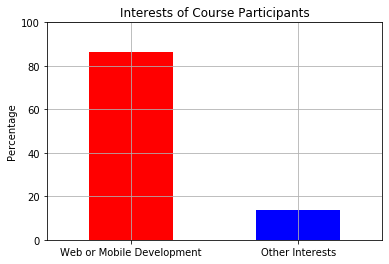

In [10]:
webORmobile_f.plot.bar(color=['red','blue'], grid=True)

plt.title('Interests of Course Participants')
plt.xticks([0,1],['Web or Mobile Development', 'Other Interests'],rotation = 0)
plt.ylabel('Percentage')
plt.ylim([0,100])

This is good news for our company. Roughly 86% of the people have some interest in Web or Mobile development learning. This is the set of students we would like to advertise our products to. 

Our next step is to figure out who to advertise to. We would like to know to which countries we must advertise to who have students willing to pay our subscription fee of $59/month.

# New Coders - Locations and Densities

For a start, lets take a frequency distribution of the students from the respective countries willing to take online courses.

**Let's make a dataframe that has only the people who answered to the interested job role.**

In [11]:
interested_people = dataset[dataset['JobRoleInterest'].notnull()].copy()

**Let's now create a dataframe representing the number of countries and their percentage of New-coders.**

In [12]:
frequencies_abs = interested_people['CountryLive'].value_counts()
frequencies_rel = interested_people['CountryLive'].value_counts(normalize=True)*100

locations = pd.DataFrame(data = {'Number of Participants': frequencies_abs,
                                'Percentage of Participants' : frequencies_rel })

In [13]:
locations

,Number of Participants,Percentage of Participants
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
...,...,...
Anguilla,1,0.014624
Nicaragua,1,0.014624
Nambia,1,0.014624
Yemen,1,0.014624


The United States has a staggering 45% of the students willing to take the course. India comes next, then the UK and then Canada. 
Let's take our analysis a little further and see how willing the students are to spend money on courses. To do this, lets focus on the top four countries only, because the other countries dont have enough students to spend on advertisements based on regions.

# Spending Money for Learning

The MoneyForLearning column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Since our e-learning company offers a subscription model of $59/month, we are interested in knowing how much these students have paid for courses.

**Lets create a column to describe how much money a student has spent on the course so far. Since some of the students in this course mentions 0 months, we will first replace it by 1, so our calculations are not put off.**

In [14]:
interested_people['MonthsProgramming'].replace(0,1, inplace = True)

**Create a new column to find the Monthly Payment each student has made**

In [15]:
interested_people['Monthly Payment'] = interested_people['MoneyForLearning'] / interested_people['MonthsProgramming']

In [16]:
print(interested_people.shape)
print(interested_people['Monthly Payment'].isnull().sum())

(6992, 137)
675


There are 675 people who have the "Monthly Payment" as a null value. Let's get rid of them.

In [17]:
interested_people = interested_people[interested_people['Monthly Payment'].notnull()]

**Let's now see the average amount paid, grouped by each country. To be safe, let's first get rid of null values of the CountryLive column.**

In [18]:
interested_people = interested_people[interested_people['CountryLive'].notnull()]

In [19]:
country_meanpay = interested_people.groupby("CountryLive").mean()['Monthly Payment'][['United States of America','India', 'United Kingdom','Canada']]

In [20]:
country_meanpay

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Monthly Payment, dtype: float64

It is interesting to see that India comes second when looking at the per-head spenditure on courses per month. So far, USA seems promising so we will keep it as the front runner. But to select a second best market we will have to take our analysis one more step deeper.

Let's see the distribution of the individual expenditure and study the outliers. 

# Dealing with Extreme Outliers

**Let's create a Box Plot for the above selected countries and study how much people are willing to pay per month**

In [21]:
top_4 = interested_people[interested_people['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

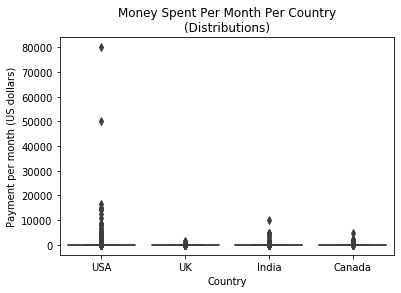

In [22]:
sns.boxplot(y = 'Monthly Payment', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.ylabel('Payment per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada']) 
plt.show()

**Let's eleminate the outliers in the USA catergory and tunnel down to payments made for less than $20,000 a month, and recompute the average monthly payment** 

In [23]:
interested_people = interested_people[interested_people['Monthly Payment'] < 20000]

**Lets check the mean of the countries again**

In [24]:
country_meanpay = interested_people.groupby("CountryLive").mean()['Monthly Payment'][['United States of America','India', 'United Kingdom','Canada']]
country_meanpay

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: Monthly Payment, dtype: float64

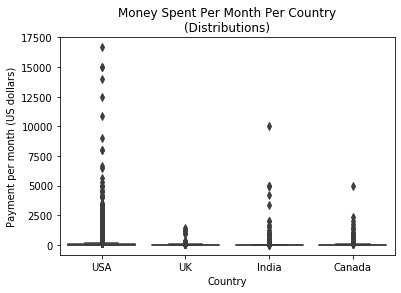

In [25]:
top_4 = interested_people[interested_people['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

sns.boxplot(y = 'Monthly Payment', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)')
plt.ylabel('Payment per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada']) 
plt.show()

It seems like India has outliers. Judging by their GDP relative to the other countries, it is statistically unlikely this can occur. Lets take a look at these outliers to get to know them further.

In [26]:
indian_outliers = interested_people[(interested_people["CountryLive"] == 'India') & 
                                   (interested_people["Monthly Payment"] >= 2500)]

In [27]:
indian_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly Payment
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,Na

Interestingly, these students did not take any BootCamps. It could be that they mistook this question. Either way, a good bet is to remove these outliers. 

In [28]:
top_4 = top_4.drop(indian_outliers.index) 

Going back to our box plot, we can see that USA has some outliers too. Let's focus on the ones above $6000/month and study their tables to see anything interesting.

In [29]:
usa_outliers = interested_people[(interested_people["CountryLive"] == 'United States of America') & 
                                   (interested_people["Monthly Payment"] >= 6000)]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly Payment
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

Two interesting observations could be made by studying the above DataFrame.
1. Six attended bootcamps, others didnt. It is hard to know why they spent so much of money, so we will remove this catergory of students.
2. Eight of the students seem to have paid way too much for one month with less than 3 months of coding experience. This could be a one time payment for a course that takes many months, hench a large amount of money paid in one month. To be safe, let's get rid of this catergory as well. 


In [30]:
no_bootcamp = top_4[
    (top_4['CountryLive'] == 'United States of America') & 
    (top_4['Monthly Payment'] >= 6000) &
    (top_4['AttendedBootcamp'] == 0)]
top_4 = top_4.drop(no_bootcamp.index)

less_than_3_months = top_4[
    (top_4['CountryLive'] == 'United States of America') & 
    (top_4['Monthly Payment'] >= 6000) &
    (top_4['MonthsProgramming'] <= 3)]

top_4 = top_4.drop(less_than_3_months.index)

Now let's focus on Canada's outlier.

In [31]:
canada_outliers = top_4[
    (top_4['CountryLive'] == 'Canada') & 
    (top_4['Monthly Payment'] > 4500)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,Monthly Payment
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This student also seems to have paid a one time fee for a course that spans months. To be safe, let's remove this student

In [32]:
top_4 = top_4.drop(canada_outliers.index)

Now that we analytically removed the outliers, let's see how our boxplots have changed.

In [33]:
top_4.groupby('CountryLive').mean()['Monthly Payment'].sort_values()

CountryLive
United Kingdom               45.534443
India                        65.758763
Canada                       93.065400
United States of America    142.654608
Name: Monthly Payment, dtype: float64

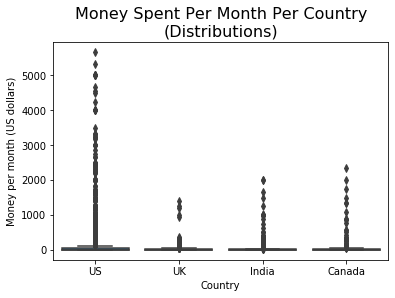

In [34]:

sns.boxplot(y = 'Monthly Payment', x = 'CountryLive',
            data = top_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)',
          fontsize = 16)
plt.ylabel('Money per month (US dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada']) # avoids tick labels overlap
plt.show()

# Choosing the Two Best Markets

At first glance, it is evident that the US Market must definietly be advertised to. Students are willing to pay $142/month, and since our subscription is $59/month, it will be of great value to the students as well as it will be easier to capture them.

It is also advisable not to market to the UK students, since their average is below our subscription price.

Canada seems to be a good second option with students willing to pay around $93/month. Also the average student in India can also afford our subscription. Let's try to identify which is the better of the two. Let's take a look at the propotion of students who can afford our subscription.

In [35]:
top_4["CountryLive"].value_counts(normalize=True)*100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

Here, we see an interesting find. Canada has the least amount of students when propotions are considered. In fact, India comes to #2. On a solely analytical point of view, it makes sense to target the Indian market as the second best market. 

# Conclusion

From the analysis above, it is clear that we must target the USA students for sure. For the second best market, I suggest to target the Indian students, since the above analysis proves that we can reach more students than in Canada. 